# Assignment 4: Convex Optimization

## Part (A): Unconstrained 
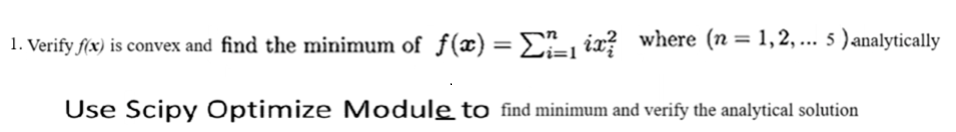

In [6]:
import numpy as np
from scipy.optimize import minimize

# function f(x) = sum_{i=1..5} i * x_i^2
def func(x):
    # expects x length 5: x[0] -> x1, ..., x[4] -> x5
    return sum((i+1) * x[i]**2 for i in range(5))

x0 = np.array([1.0, -2.0, 3.0, -1.5, 0.5])  # arbitrary initial guess

res = minimize(func, x0, method='BFGS')  # BFGS approximates the Jacobian numerically
print("Success:", res.success)
print("Message:", res.message)
print("Optimal x:", res.x)
print("Minimum value:", res.fun)

Success: True
Message: Optimization terminated successfully.
Optimal x: [ 9.13848277e-08  2.12608104e-07  1.63523973e-08 -2.79522402e-08
 -7.19286644e-08]
Minimum value: 1.2855177637749928e-13


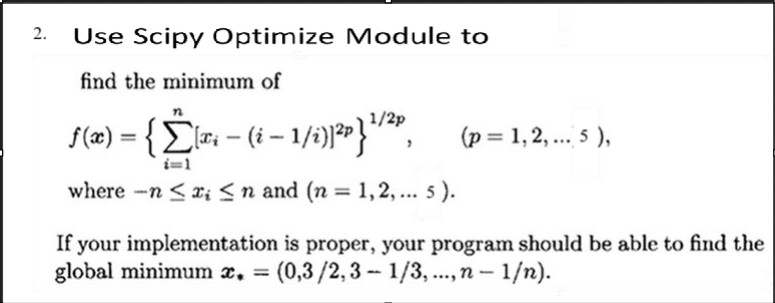

In [9]:
import numpy as np
from scipy.optimize import minimize

def f(x, n, p):
    return (np.sum([(x[i] - (i+1 - 1/(i+1)))**(2*p) for i in range(n)]))**(1/(2*p)) 
# range is 0 to n-1 so i=i+1 for range 1 to n

# Parameters
n = 5   

for p in range(1, 6):  # p from 1 to 5
    print(f"Optimizing for p = {p}")
    
    # Initial guess (zero vector)
    x0 = np.zeros(n)

    # Bounds: -n <= xi <= n
    bounds = [(-n, n) for xi in range(1,n+1)]

    # Minimize
    res = minimize(f, x0, args=(n,p), bounds=bounds)

    print("Optimal x:", res.x)
    print("Minimum f(x):", res.fun)


Optimizing for p = 1
Optimal x: [-4.43791767e-09  1.50000000e+00  2.66666666e+00  3.75000000e+00
  4.80000000e+00]
Minimum f(x): 9.162689685237472e-09
Optimizing for p = 2
Optimal x: [-1.25578303e-09  1.50000000e+00  2.66666666e+00  3.75000000e+00
  4.80000000e+00]
Minimum f(x): 6.755278245628305e-09
Optimizing for p = 3
Optimal x: [-6.62568041e-10  1.49999999e+00  2.66666666e+00  3.75000000e+00
  4.80000000e+00]
Minimum f(x): 1.0432222577628404e-08
Optimizing for p = 4
Optimal x: [-3.19867753e-12  1.49999998e+00  2.66666666e+00  3.74999999e+00
  4.80000000e+00]
Minimum f(x): 1.8154706103990147e-08
Optimizing for p = 5
Optimal x: [-3.28500703e-11  1.50000000e+00  2.66666666e+00  3.75000000e+00
  4.80000000e+00]
Minimum f(x): 4.941007174007535e-09


## Part (B): Constrained
### Use  SQP algorithm of Scipy optimize module to solve given problems and also verify analytically using Lagrange’s multiplier/KKT conditions 
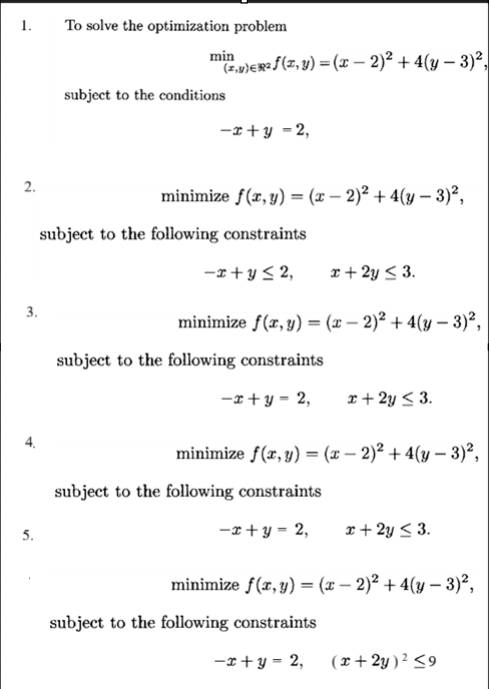



 ### Using Sequential Least Squares Programming Method

In [5]:
import numpy as np
from scipy.optimize import minimize

# Objective function
def f(x):
    return (x[0] - 2)**2 + (4*((x[1] - 3)**2))

# Equality constraint: -x1 + x2 = 2
def q1_eq_constraint(x):
    return (x[1] - x[0] - 2)

# Scipy interprets inequality constraints as fun(x) >= 0.
# Inequality constraint: -x1 + x2 <= 2  →  0 >= x2 - x1 -2
def q2_ineq_constraint_1(x):
    return x[0] - x[1] - 2

def q2_ineq_constraint_2(x):
    return x[0] + 2*x[1] - 3

def q3_eq_constraint(x):
    return q1_eq_constraint(x)

def q3_ineq_constraint(x):
    return q2_ineq_constraint_2(x)

def q4_eq_constraint(x):
    return q1_eq_constraint(x)

def q4_ineq_constraint(x):
    return ((x[0] + 2*x[1])**2) - 9

# Constraints
# Scipy interprets inequality constraints as fun(x) >= 0.
constraints = [
    [{'type': 'eq', 'fun': q1_eq_constraint}],
    
    [{'type': 'ineq', 'fun': q2_ineq_constraint_1},
    {'type': 'ineq', 'fun': q2_ineq_constraint_2}],
    
    [{'type': 'eq', 'fun': q3_eq_constraint},
    {'type': 'ineq', 'fun': q3_ineq_constraint}],
    
    [{'type': 'eq', 'fun': q4_eq_constraint},
    {'type': 'ineq', 'fun': q4_ineq_constraint}]
]

# Solve using lagrange multipliers
x0 = np.array([1.2, 3.2])  # Initial guess
for constrain in constraints:
    i = constraints.index(constrain)
    print(f"\nSolving for constraint set {i+1}")
    res = minimize(f, x0, constraints=constraints[i], method='SLSQP') 
    # Sequential Least Squares Programming
    print("Optimal x:", res.x)
    print("Minimum f(x):", res.fun)
    print("Success:", res.success)
    print("Message:", res.message)
    print("Lagrange multipliers:", res.jac)  # Gradient at the solution
    print("Number of iterations:", res.nit)
    print("Function evaluations:", res.nfev)
    print("Constraint evaluations:", res.njev)
    #print("Hessian evaluations:", res.nhev)
    #print("Optimality (should be close to 0):", res.optimality)
    print("Status:", res.status)
    print("All details:", res)


Solving for constraint set 1
Optimal x: [1.2 3.2]
Minimum f(x): 0.8000000000000004
Success: True
Message: Optimization terminated successfully
Lagrange multipliers: [-1.59999999  1.60000006]
Number of iterations: 1
Function evaluations: 3
Constraint evaluations: 1
Status: 0
All details:      message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.8000000000000004
           x: [ 1.200e+00  3.200e+00]
         nit: 1
         jac: [-1.600e+00  1.600e+00]
        nfev: 3
        njev: 1
 multipliers: [ 1.600e+00]

Solving for constraint set 2
Optimal x: [4.39999999 2.39999999]
Minimum f(x): 7.199999999999918
Success: True
Message: Optimization terminated successfully
Lagrange multipliers: [ 4.80000001 -4.80000007]
Number of iterations: 6
Function evaluations: 20
Constraint evaluations: 6
Status: 0
All details:      message: Optimization terminated successfully
     success: True
      status: 0
         fun: 7.199999999999918
           x: [ 4.40

### Using Trust-Constr Method

In [7]:
import numpy as np
from scipy.optimize import minimize, NonlinearConstraint

# Objective function
def f(x):
    return (x[0] - 2)**2 + 4*((x[1] - 3)**2)

# ----------------------------
# Constraints (as functions)
# ----------------------------
# Equality constraint: -x1 + x2 = 2  →  x2 - x1 - 2 = 0
def q1_eq_constraint(x):
    return x[1] - x[0] - 2

# Inequality constraint 1: -x1 + x2 <= 2  →  x0 - x1 - 2 >= 0
def q2_ineq_constraint_1(x):
    return x[0] - x[1] - 2

# Inequality constraint 2: x1 + 2x2 <= 3  →  3 - (x0 + 2x1) >= 0
def q2_ineq_constraint_2(x):
    return 3 - (x[0] + 2*x[1])

# Same as question 3 & 4 but combined
def q3_eq_constraint(x):
    return q1_eq_constraint(x)

def q3_ineq_constraint(x):
    return q2_ineq_constraint_2(x)

def q4_eq_constraint(x):
    return q1_eq_constraint(x)

def q4_ineq_constraint(x):
    return 9 - ((x[0] + 2*x[1])**2)  # must be >= 0 for trust-constr
# ----------------------------

# Define constraint sets using NonlinearConstraint
constraint_sets = [
    [NonlinearConstraint(q1_eq_constraint, 0, 0)],

    [NonlinearConstraint(q2_ineq_constraint_1, 0, np.inf),
     NonlinearConstraint(q2_ineq_constraint_2, 0, np.inf)],

    [NonlinearConstraint(q3_eq_constraint, 0, 0),
     NonlinearConstraint(q3_ineq_constraint, 0, np.inf)],

    [NonlinearConstraint(q4_eq_constraint, 0, 0),
     NonlinearConstraint(q4_ineq_constraint, 0, np.inf)]
]

# Initial guess
x0 = np.array([1.2, 3.2])

# ----------------------------
# Solve each constraint set
# ----------------------------
for i, constraint_set in enumerate(constraint_sets, start=1):
    print(f"\n🔹 Solving for constraint set {i}")
    res = minimize(f, x0, method='trust-constr', constraints=constraint_set)

    print("Optimal x:", res.x)
    print("Minimum f(x):", res.fun)
    print("Success:", res.success)
    print("Message:", res.message)
    print("Number of iterations:", res.niter)
    print("Lagrange multipliers (λ):", res.v)
    print("Gradient at solution (∇f):", res.grad)
    print("Status:", res.status)
    print("All details:", res)
    print("-------------------------------------------------------")



🔹 Solving for constraint set 1
Optimal x: [1.2 3.2]
Minimum f(x): 0.8000000000000004
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 10
Lagrange multipliers (λ): [array([-1.6000001])]
Gradient at solution (∇f): [-1.59999999  1.60000019]
Status: 2
All details:           message: `xtol` termination condition is satisfied.
          success: True
           status: 2
              fun: 0.8000000000000004
                x: [ 1.200e+00  3.200e+00]
              nit: 10
             nfev: 30
             njev: 10
             nhev: 0
         cg_niter: 9
     cg_stop_cond: 1
             grad: [-1.600e+00  1.600e+00]
  lagrangian_grad: [ 9.321e-08  9.321e-08]
           constr: [array([ 0.000e+00])]
              jac: [array([[-1.000e+00,  1.000e+00]])]
      constr_nfev: [30]
      constr_njev: [0]
      constr_nhev: [0]
                v: [array([-1.600e+00])]
           method: equality_constrained_sqp
       optimality: 9.32098687123073e-08
 cons